In [4]:
import tracking.TrajectorySimulator

In [53]:
import PIL.Image
import PIL.ImageDraw
import cv2
import numpy

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
cd '/home/fmpaezri/repos/coco/PythonAPI/'

/home/fmpaezri/repos/coco/PythonAPI


In [24]:
import pycocotools.coco

In [25]:
cd '/home/fmpaezri/repos/localization-agent/'

/home/fmpaezri/repos/localization-agent


In [28]:
dataDir='/home/datasets/datasets1/mscoco/'
dataType='train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [29]:
%time coco = pycocotools.coco.COCO(annFile)

loading annotations into memory...
Done (t=12.34s)
creating index...
index created!


In [33]:
catIds = coco.getCatIds()
cats = coco.loadCats()
nms=[cat['name'] for cat in cats]

In [34]:
imgIds = coco.getImgIds(catIds=catIds)

In [37]:
len(catIds)

80

In [36]:
len(imgIds)

700

In [126]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
image = PIL.Image.open('%s/%s/%s'%(dataDir,dataType,img['file_name']))

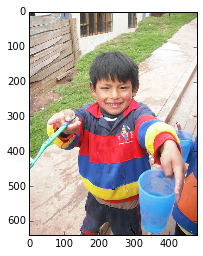

In [127]:
imshow(numpy.asarray(image))

In [128]:
#What means crowd?
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

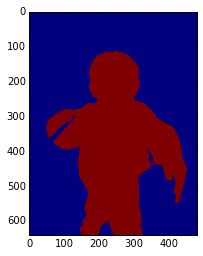

In [132]:
imageMask = PIL.Image.new('L', image.size, 255)
cropMask = PIL.Image.new('L', image.size, 0)
maskDraw = PIL.ImageDraw.Draw(cropMask)
maskDraw.polygon(anns[1]['segmentation'][0], fill=255)
imshow(numpy.asarray(cropMask))

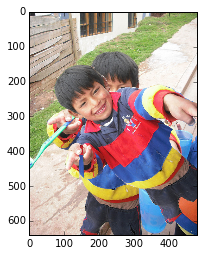

In [133]:
#image.putalpha(imageMask)
imageCrop = image.crop((0,0)+image.size)
imageCrop.putalpha(cropMask)
rotatedCrop = imageCrop.rotate(45)
imageCopy=image.copy()
imageCopy.paste(rotatedCrop, mask=rotatedCrop)
imshow(numpy.asarray(imageCopy))

In [134]:
reload(tracking.TrajectorySimulator)

<module 'tracking.TrajectorySimulator' from 'tracking/TrajectorySimulator.pyc'>

In [135]:
aSampler = tracking.TrajectorySimulator.AffineSampler()

AttributeError: 'module' object has no attribute 'AffineSampler'